- Snkar Mam
- Mikael Slotboom
- Dorin-Mihai Manea

# Exercice 1
1. Il y a 3 états : S (sain), I (infecté) et R (guéri).\
La taille du vecteur de probabilités initiales est du coup 3.\
La taille de la matrice des probabilités de transition est 3x3.

In [790]:
pi0 = [0.9, 0.1, 0]

In [791]:
A = [[0.92, 0.08, 0],
     [0, 0.93, 0.07],
     [0, 0, 1]]  

In [792]:
def is_stochastic(M):
    if len(M) != len(M[0]):
        return False

    for i in range(len(M)):
        sum_line = 0

        for j in range(len(M)):
            if M[i][j] < 0 or M[i][j] > 1:
                return False
            
            sum_line += M[i][j]
        
        if sum_line != 1:
            return False
    
    return True


is_stochastic(A)


True

## Exercice 1.1
1. pi1 = pi0 * A = [0.9 * 0.92, 0.9 * 0.08 + 0.1 * 0.93, 0.1 * 0.07] = [0.828, 0.165, 0.007]
2. pi2 = pi1 * A = [0.828 * 0.92, 0.828 * 0.08 + 0.165 * 0.93, 0.165 * 0.07 + 0.007 * 1] = [0.76176, 0.21969, 0.01855]

In [793]:
def mult_vect_matrix(v, M):
    new_v = [0, 0, 0]

    for i in range(len(v)):
        for j in range(len(v)):
            new_v[i] += v[j] * M[j][i]
    
    return new_v

def pi_distribution(pi0, A, time):
    pi_distrib = [pi0]

    for i in range(time - 1):
        new_pi = mult_vect_matrix(pi_distrib[i], A)
        pi_distrib.append(new_pi)
    
    return pi_distrib

time = 201
pi_distribution(pi0, A, time)

[[0.9, 0.1, 0],
 [0.8280000000000001, 0.16500000000000004, 0.007000000000000001],
 [0.7617600000000001, 0.21969000000000005, 0.018550000000000004],
 [0.7008192000000001, 0.26525250000000006, 0.03392830000000001],
 [0.6447536640000001, 0.3027503610000001, 0.052495975000000014],
 [0.5931733708800001, 0.3331381288500001, 0.07368850027000003],
 [0.5457195012096001, 0.3572723295009001, 0.09700816928950004],
 [0.5020619411128321, 0.3759208265326051, 0.12201723235456305],
 [0.46189698582380556, 0.3897713239643494, 0.14833169021184542],
 [0.42494522695790116, 0.3994390901527494, 0.17561568288934987],
 [0.39094960880126906, 0.40547397199868906, 0.20357641920004232],
 [0.35967364009716757, 0.4083667626628824, 0.23195959723995058],
 [0.33089974888939416, 0.4085549804842541, 0.26054527062635235],
 [0.30442776897824264, 0.40642811176150784, 0.28914411926025013],
 [0.28007354745998325, 0.40233236545646167, 0.3175940870835557],
 [0.2576676636631846, 0.396574983671308, 0.345757352665508],
 [0.23705425

Text(0, 0.5, 'Probabilité')

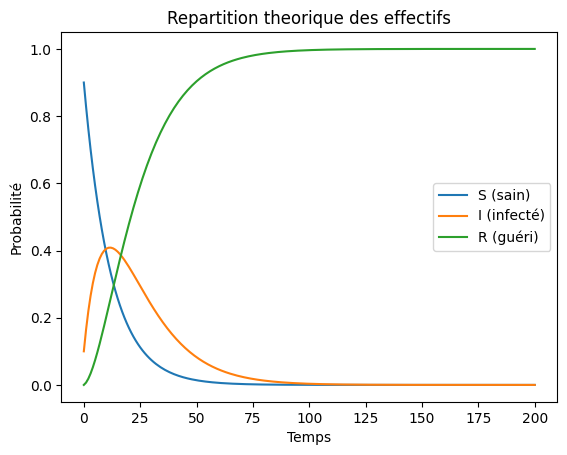

In [794]:
import matplotlib.pyplot as plt

pi_distrib = pi_distribution(pi0, A, time)
plt.plot(range(time), [pi_distrib[i][0] for i in range(time)])
plt.plot(range(time), [pi_distrib[i][1] for i in range(time)])
plt.plot(range(time), [pi_distrib[i][2] for i in range(time)])
plt.title('Repartition theorique des effectifs')
plt.legend(['S (sain)', 'I (infecté)', 'R (guéri)'])
plt.xlabel('Temps')
plt.ylabel('Probabilité')

## Exercice 1.2

In [795]:
import random as rd

def sim_individual(pi0, T, A):
    simulation = []
    etat = rd.choices(['S', 'I', 'R'], weights=pi0, k=1)[0]
    simulation.append(etat)

    for i in range(1, T):
        if simulation[i - 1] == 'S':
            r = rd.choices(['S', 'I', 'R'], weights=A[0], k=1)[0]
        elif simulation[i - 1] == 'I':
            r = rd.choices(['S', 'I', 'R'], weights=A[1], k=1)[0]
        else:
            r = rd.choices(['S', 'I', 'R'], weights=A[2], k=1)[0]
        simulation.append(r)

    return simulation

T = 150
sim_individual(pi0, T, A)

['S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R',
 'R']

Text(0, 0.5, "Nombre d'invidus")

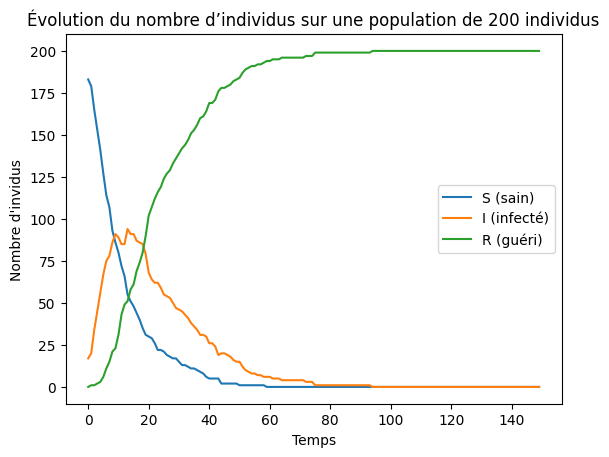

In [796]:
def sim_population(N, pi0, T):
    population = []

    for _ in range(T):
        population.append([])

    for _ in range(N):
        individu = sim_individual(pi0, T, A)

        for i in range(T):
            population[i].append(individu[i])
    
    return population

N1 = 200
population1 = sim_population(N1, pi0, T)

plt.plot(range(T), [population1[i].count('S') for i in range(T)])
plt.plot(range(T), [population1[i].count('I') for i in range(T)])
plt.plot(range(T), [population1[i].count('R') for i in range(T)])
plt.title('Évolution du nombre d’individus sur une population de ' + str(N1) + ' individus')
plt.legend(['S (sain)', 'I (infecté)', 'R (guéri)'])
plt.xlabel('Temps')
plt.ylabel("Nombre d'invidus")

Text(0, 0.5, 'Probabilité')

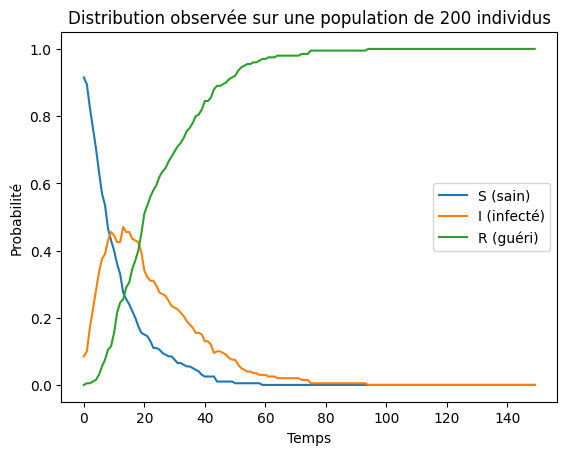

In [797]:
plt.plot(range(T), [population1[i].count('S') / N1 for i in range(T)])
plt.plot(range(T), [population1[i].count('I') / N1 for i in range(T)])
plt.plot(range(T), [population1[i].count('R') / N1 for i in range(T)])
plt.title('Distribution observée sur une population de ' + str(N1) + ' individus')
plt.legend(['S (sain)', 'I (infecté)', 'R (guéri)'])
plt.xlabel('Temps')
plt.ylabel("Probabilité")

Text(0, 0.5, "Nombre d'invidus")

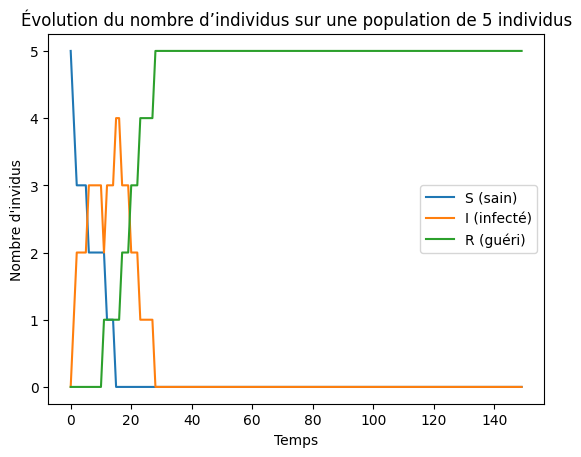

In [798]:
N2 = 5
population2 = sim_population(N2, pi0, T)

plt.plot(range(T), [population2[i].count('S') for i in range(T)])
plt.plot(range(T), [population2[i].count('I') for i in range(T)])
plt.plot(range(T), [population2[i].count('R') for i in range(T)])
plt.title('Évolution du nombre d’individus sur une population de ' + str(N2) + ' individus')
plt.legend(['S (sain)', 'I (infecté)', 'R (guéri)'])
plt.xlabel('Temps')
plt.ylabel("Nombre d'invidus")

Text(0, 0.5, 'Probabilité')

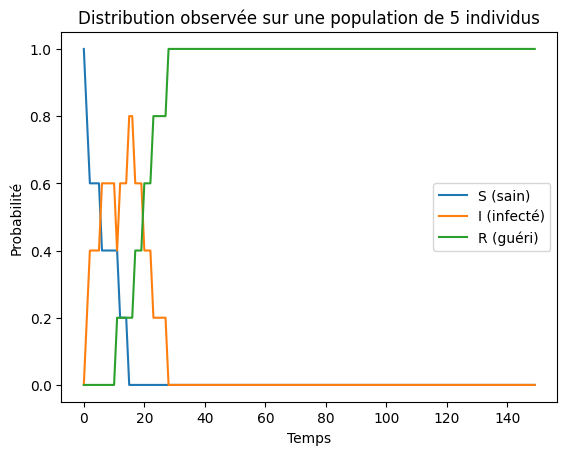

In [799]:
plt.plot(range(T), [population2[i].count('S') / N2 for i in range(T)])
plt.plot(range(T), [population2[i].count('I') / N2 for i in range(T)])
plt.plot(range(T), [population2[i].count('R') / N2 for i in range(T)])
plt.title('Distribution observée sur une population de ' + str(N2) + ' individus')
plt.legend(['S (sain)', 'I (infecté)', 'R (guéri)'])
plt.xlabel('Temps')
plt.ylabel("Probabilité")

Text(0, 0.5, "Nombre d'invidus")

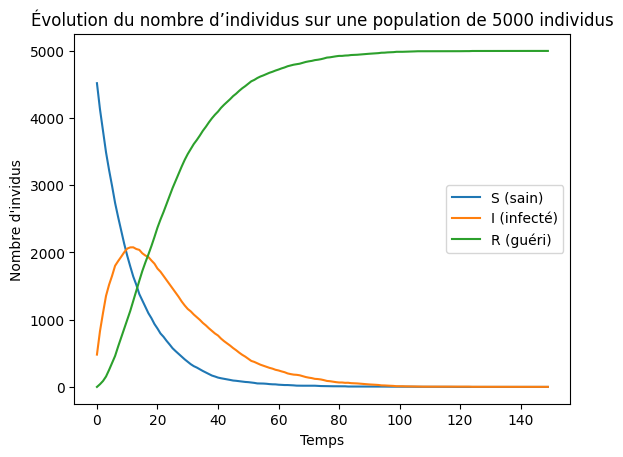

In [800]:
N3 = 5000
population3 = sim_population(N3, pi0, T)

plt.plot(range(T), [population3[i].count('S') for i in range(T)])
plt.plot(range(T), [population3[i].count('I') for i in range(T)])
plt.plot(range(T), [population3[i].count('R') for i in range(T)])
plt.title('Évolution du nombre d’individus sur une population de ' + str(N3) + ' individus')
plt.legend(['S (sain)', 'I (infecté)', 'R (guéri)'])
plt.xlabel('Temps')
plt.ylabel("Nombre d'invidus")

Text(0, 0.5, 'Probabilité')

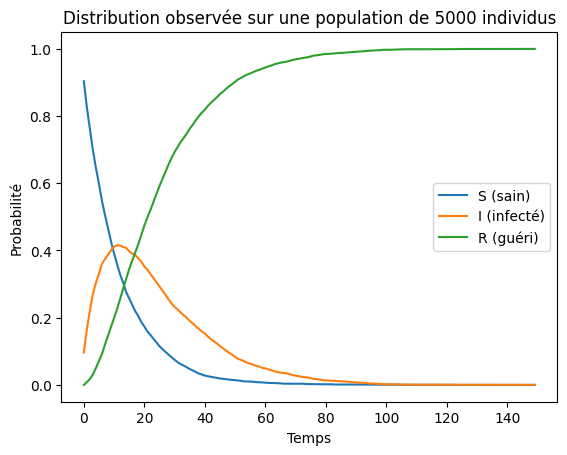

In [801]:
plt.plot(range(T), [population3[i].count('S') / N3 for i in range(T)])
plt.plot(range(T), [population3[i].count('I') / N3 for i in range(T)])
plt.plot(range(T), [population3[i].count('R') / N3 for i in range(T)])
plt.title('Distribution observée sur une population de ' + str(N3) + ' individus')
plt.legend(['S (sain)', 'I (infecté)', 'R (guéri)'])
plt.xlabel('Temps')
plt.ylabel("Probabilité")

## Exercice 1.3

In [802]:
I = [population1[i].count('I') for i in range(T)]
m_obs = sum(I) / N1

print("Estimation de la longeur d'infection sur une population de", N1, ":", m_obs)

Estimation de la longeur d'infection sur une population de 200 : 13.81


Soit X la loi géométrique, avec p = P(X = R) = 0.07 et q = P(X = I) = 0.93. \
Estimation theorique de la longeur moyenne d'une séquence de I : E[X] = 1 / p = 14.2857. \
La longueur moyenne observée est parfois plus grande, parfois plus petite, mais elle tend vers la longueur théorique.

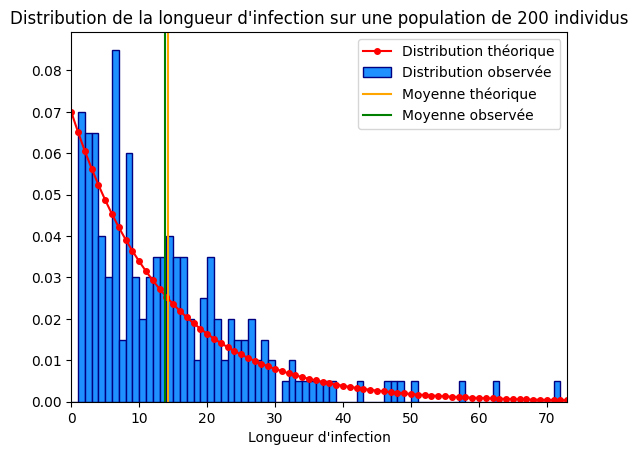

In [803]:
I = [sum(1 for j in range(T) if population1[j][i] == 'I') for i in range(N1)]
p = 0.07
q = 0.93
X_geom = [p * q ** i for i in range(T)]
m_th = 1 / p

plt.plot(range(T), X_geom, '-o', markersize=4, color='red', label='Distribution théorique')
plt.hist(I, bins = range(max(I) + 1), density=True, color='dodgerblue', edgecolor='navy', label='Distribution observée')
plt.xlim([0, min(max(I) + 1, T)])
plt.axvline(m_th, color='orange', label='Moyenne théorique')
plt.axvline(m_obs, color='green', label='Moyenne observée')
plt.xlabel("Longueur d'infection")
plt.title("Distribution de la longueur d'infection sur une population de " + str(N1) + " individus")
plt.legend()

## Exercice 1.4

In [804]:
# TODO: corriger la fonction pour marcher dans tous les cas

def estim_matrix(individu):
    # Initialiser la matrice de transitions
    transition_matrix = {'S': {'S': 0, 'I': 0, 'R': 0},
                         'I': {'S': 0, 'I': 0, 'R': 0},
                         'R': {'S': 0, 'I': 0, 'R': 0}}

    # Compter les transitions dans la séquence
    for i in range(len(individu) - 1):
        transition_matrix[individu[i]][individu[i+1]] += 1

    # Convertir les comptes en probabilités
    for state in transition_matrix:
        total_transitions = sum(transition_matrix[state].values())
        for next_state in transition_matrix[state]:
            transition_matrix[state][next_state] /= total_transitions

    return transition_matrix

individu = sim_individual(pi0, T, A)
estim_matrix(individu)

{'S': {'S': 0.9333333333333333, 'I': 0.06666666666666667, 'R': 0.0},
 'I': {'S': 0.0, 'I': 0.9333333333333333, 'R': 0.06666666666666667},
 'R': {'S': 0.0, 'I': 0.0, 'R': 1.0}}